In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn import metrics

In [2]:
mpl.rcParams['font.family'] = 'NanumGothic'

<br>
### 스터디 멤버들마다
가장 재미있게 본 영화를 최대 10개씩 수집한 데이터 입니다

In [3]:
df = pd.read_csv('./mlmath_trigonometry_180421 - 영화종합.csv')
df.groupby('name').count()

,movie,genre
name,,
김현일,8,8
성민기,10,10
손지훈,10,10
유지석,10,10
이수진,10,10
이아름,10,10
지태훈,10,10
최광준,10,10
최영록,10,10


<br>
각자 재미있게 본 영화 제목과 영화 장르가 적혀있습니다

In [4]:
df[df.name == '최영록']

,name,movie,genre
0,최영록,러브레터,멜로
1,최영록,8월의 크리스마스,멜로
2,최영록,밀양,드라마
3,최영록,장고,액션
4,최영록,인생은 아름다워,드라마
5,최영록,라이언일병구하기,액션
6,최영록,타짜,오락
7,최영록,리틀포레스트,드라마
8,최영록,유브갓메일,멜로
9,최영록,터미널,드라마


In [5]:
df[df.name == '이수진']

,name,movie,genre
30,이수진,굿윌헌팅,드라마
31,이수진,해리가 셀리를 만났을때,멜로
32,이수진,씨애틀의 잠못이루는밤,멜로
33,이수진,라라랜드,뮤지컬
34,이수진,스파이더맨,SF
35,이수진,어벤져스,SF
36,이수진,해리포터,판타지
37,이수진,8월의 크리스마스,멜로
38,이수진,당신이 사랑하는 동안에,멜로
39,이수진,보스베이비,애니메이션


<br>
### 나와 비슷한 영화 취향
을 가진 멤버가 누구인지 이 데이터를 활용해 알아낼 수 있을 것 같습니다

In [6]:
res = df.groupby(['name', 'genre']).count().reset_index()
res = res.pivot_table(index='name', columns='genre', values='movie')
res.fillna(0, inplace=True)
res

genre,SF,드라마,멜로,뮤지컬,애니메이션,액션,오락,코믹,판타지
name,,,,,,,,,
김현일,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
성민기,2.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
손지훈,3.0,1.0,3.0,0.0,2.0,1.0,0.0,0.0,0.0
유지석,8.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
이수진,2.0,1.0,4.0,1.0,1.0,0.0,0.0,0.0,1.0
이아름,3.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,1.0
지태훈,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
최광준,0.0,7.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
최영록,0.0,4.0,3.0,0.0,0.0,2.0,1.0,0.0,0.0


<br>
눈으로 보기에도 멤버별로 좋아하는 영화 장르가 다릅니다

In [7]:
res[res['SF'] >= 5]

genre,SF,드라마,멜로,뮤지컬,애니메이션,액션,오락,코믹,판타지
name,,,,,,,,,
김현일,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
유지석,8.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
지태훈,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


SF 영화를 좋아하는 멤버들도 있고

<br>

In [8]:
res[res[u'드라마'] >= 4]

genre,SF,드라마,멜로,뮤지컬,애니메이션,액션,오락,코믹,판타지
name,,,,,,,,,
성민기,2.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
최광준,0.0,7.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
최영록,0.0,4.0,3.0,0.0,0.0,2.0,1.0,0.0,0.0


드라마 장르를 좋아하는 멤버도 있네요

<br>

[]

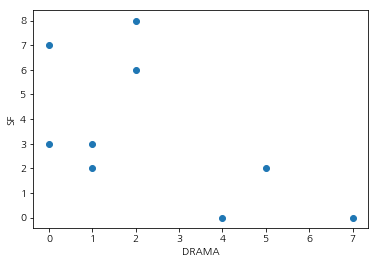

In [9]:
plt.scatter(x='드라마', y='SF', data=res)
plt.xlabel('DRAMA')
plt.ylabel('SF')
plt.plot()

scatter plot으로 `드라마` 장르와 `SF` 장르 영화 갯수를 그려보면 영화 장르 선호에 대한 `군집`이 보입니다

서로 가까이 모여있는 점도 있고, 멀리 떨어져 있는 점도 있습니다

<br>
### 비슷하다
는 개념을 수치화하기 위해서 샘플들 간의 `거리(distance)` 를 측정할 수 있습니다.

[]

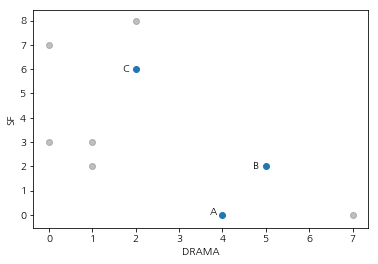

In [10]:
idx_a = list(res[(res['드라마'] == 4) & (res['SF'] == 0)].index)
idx_b = list(res[(res['드라마'] == 5) & (res['SF'] == 2)].index)
idx_c = list(res[(res['드라마'] == 2) & (res['SF'] == 6)].index)
plt.scatter(x='드라마', y='SF', data=res[~res.index.isin(idx_a + idx_b + idx_c)], c='grey', alpha=.5)
plt.scatter(x='드라마', y='SF', data=res.loc[idx_a + idx_b + idx_c, :])
plt.text(3.7, 0, 'A')
plt.text(4.7, 1.9, 'B')
plt.text(1.7, 5.9, 'C')
plt.xlabel('DRAMA')
plt.ylabel('SF')
plt.plot()

드라마 4개와 SF 0개를 좋아한다고 보고한 `A` 는  
드라마 2개와 SF 6개를 좋아하는 `C`보다   
드라마 5개와 SF 2개를 좋아한다고 보고한 `B`와  
더 `가까워` 보입니다

<br>
### Euclidean Distance
를 활용해서 점과 점사이의 거리를 구할 수 있습니다

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Euclidean_distance_2d.svg/220px-Euclidean_distance_2d.svg.png">

\begin{aligned}
d(\mathbf {p} ,\mathbf {q} )=d(\mathbf {q} ,\mathbf {p} )&={\sqrt {(q_{1}-p_{1})^{2}+(q_{2}-p_{2})^{2}+\cdots +(q_{n}-p_{n})^{2}}}\\[8pt]&={\sqrt {\sum _{i=1}^{n}(q_{i}-p_{i})^{2}}}.
\end{aligned}

피타고라스의 정리를 일반화해서 n차원 의 두점 사이의 거리가 계산됩니다

<br>

In [11]:
target = res[['드라마', 'SF']]
target.index = ['김현일(C)', '성민기(B)', '손지훈', '유지석', '이수진', '이아름', '지태훈', '최광준', '최영록(A)']
target

genre,드라마,SF
김현일(C),2.0,6.0
성민기(B),5.0,2.0
손지훈,1.0,3.0
유지석,2.0,8.0
이수진,1.0,2.0
이아름,0.0,3.0
지태훈,0.0,7.0
최광준,7.0,0.0
최영록(A),4.0,0.0


<br>
`드라마`, `SF` 2 차원 평면에서 샘플들 간의 거리를 측정하면 다음과 같습니다

In [12]:
euc_score = pd.DataFrame(metrics.euclidean_distances(target))
euc_score.index = target.index
euc_score.columns = target.index
euc_score

,김현일(C),성민기(B),손지훈,유지석,이수진,이아름,지태훈,최광준,최영록(A)
김현일(C),0.000000,5.000000,3.162278,2.000000,4.123106,3.605551,2.236068,7.810250,6.324555
성민기(B),5.000000,0.000000,4.123106,6.708204,4.000000,5.099020,7.071068,2.828427,2.236068
손지훈,3.162278,4.123106,0.000000,5.099020,1.000000,1.000000,4.123106,6.708204,4.242641
유지석,2.000000,6.708204,5.099020,0.000000,6.082763,5.385165,2.236068,9.433981,8.246211
이수진,4.123106,4.000000,1.000000,6.082763,0.000000,1.414214,5.099020,6.324555,3.605551
이아름,3.605551,5.099020,1.000000,5.385165,1.414214,0.000000,4.000000,7.615773,5.000000
지태훈,2.236068,7.071068,4.123106,2.236068,5.099020,4.000000,0.000000,9.899495,8.062258
최광준,7.810250,2.828427,6.708204,9.433981,6.324555,7.615773,9.899495,0.000000,3.000000
최영록(A),6.324555,2.236068,4.242641,8.246211,3.605551,5.000000,8.062258,3.000000,0.000000


[]

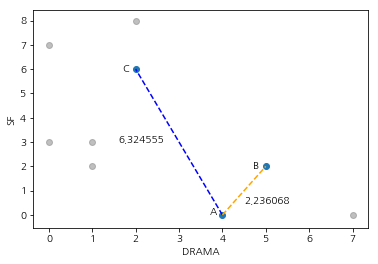

In [13]:
plt.scatter(x='드라마', y='SF', data=res[~res.index.isin(idx_a + idx_b + idx_c)], c='grey', alpha=.5)
plt.scatter(x='드라마', y='SF', data=res.loc[idx_a + idx_b + idx_c, :])
plt.text(3.7, 0, 'A')
plt.text(4.7, 1.9, 'B')
plt.text(1.7, 5.9, 'C')
plt.plot([4,2], [0,6], '--', c='b')
plt.plot([4,5], [0,2], '--', c='orange')
plt.text(1.6, 3, '6.324555')
plt.text(4.5, 0.5, '2.236068')
plt.xlabel('DRAMA')
plt.ylabel('SF')
plt.plot()

B, C가 각각 A로 부터 얼마나 멀리 떨어져 있는지를  
Euclidean Distance를 활용해 구했습니다.  
눈대중으로 느꼈던 가까움을 숫자로 나타냄으로써 표본들 간의 `비슷함`  
상대적으로 비교할 수 있게 되었습니다

In [14]:
temp = euc_score[['최영록(A)']].sort_values(by='최영록(A)')
temp['드라마'] = target['드라마']
temp['SF'] = target['SF']
temp.iloc[1:]

,최영록(A),드라마,SF
성민기(B),2.236068,5.0,2.0
최광준,3.000000,7.0,0.0
이수진,3.605551,1.0,2.0
손지훈,4.242641,1.0,3.0
이아름,5.000000,0.0,3.0
김현일(C),6.324555,2.0,6.0
지태훈,8.062258,0.0,7.0
유지석,8.246211,2.0,8.0


B는 전체 샘플들 가운데에서도 `드라마`와 `SF`라는 두 차원에서  
A와 가장 짧은 거리에 있는, 즉 비슷한 영화 장르 취향을 갖고 있는 샘플이었네요

그런데 B는 2개의 `SF` 를 좋아하는데 반해  
A는 좋아하는 영화 중 `SF` 장르가 하나도 없습니다.  

`euclidean distance` 가 가장 작다고 해서  
가장 `비슷한`, `유사한` 샘플이라고 할 수 있을까요?

[]

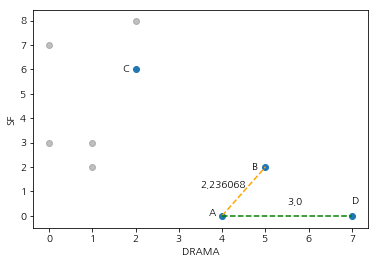

In [15]:
idx_d = list(res[(res['드라마'] == 7) & (res['SF'] == 0)].index)
plt.scatter(x='드라마', y='SF', data=res[~res.index.isin(idx_a + idx_b + idx_c + idx_d)], c='grey', alpha=.5)
plt.scatter(x='드라마', y='SF', data=res.loc[idx_a + idx_b + idx_c + idx_d, :])
plt.text(3.7, 0, 'A')
plt.text(4.7, 1.9, 'B')
plt.text(1.7, 5.9, 'C')
plt.text(7, .5, 'D')
plt.plot([4,5], [0,2], '--', c='orange')
plt.plot([4,7], [0,0], '--', c='g')
plt.text(5.5, .5, '3.0')
plt.text(3.5, 1.2, '2.236068')
plt.xlabel('DRAMA')
plt.ylabel('SF')
plt.plot()

In [16]:
target.index = ['김현일(C)', '성민기(B)', '손지훈', '유지석', '이수진', '이아름', '지태훈', '최광준(D)', '최영록(A)']
euc_score.index = ['김현일(C)', '성민기(B)', '손지훈', '유지석', '이수진', '이아름', '지태훈', '최광준(D)', '최영록(A)']
temp = euc_score[['최영록(A)']].sort_values(by='최영록(A)')
temp['드라마'] = target['드라마']
temp['SF'] = target['SF']
temp.iloc[1:]

,최영록(A),드라마,SF
성민기(B),2.236068,5.0,2.0
최광준(D),3.000000,7.0,0.0
이수진,3.605551,1.0,2.0
손지훈,4.242641,1.0,3.0
이아름,5.000000,0.0,3.0
김현일(C),6.324555,2.0,6.0
지태훈,8.062258,0.0,7.0
유지석,8.246211,2.0,8.0


D는 B보다 A와의 Euclidean Distance가 크지만   
SF 장르를 좋아하지 않고, 드라마 장르만 좋아한다고 보고했습니다.  
<br>
`3` 이라는 거리는 SF와 드라마 중에서는 드라마만 좋아한다는 `방향` 때문에 생긴 것이 아니라  
같은 `방향`에서 드라마를 좋아하는 `크기` 에 따라 발생한 것 입니다

<br>
### Vector Space
로 문제를 확장함으로써 샘플들 간의 `방향`을 측정할 수 있습니다

[]

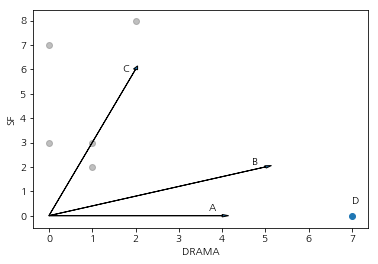

In [17]:
plt.scatter(x='드라마', y='SF', data=res[~res.index.isin(idx_a + idx_b + idx_c + idx_d)], c='grey', alpha=.5)
plt.scatter(x='드라마', y='SF', data=res.loc[idx_d, :])
plt.text(3.7, .2, 'A')
plt.text(4.7, 2.1, 'B')
plt.text(1.7, 5.9, 'C')
plt.text(7, .5, 'D')
for vec in res.loc[idx_a + idx_b + idx_c, :].iterrows():
    plt.arrow(0, 0, vec[1]['드라마'], vec[1]['SF'], head_width=.1)
plt.xlabel('DRAMA')
plt.ylabel('SF')
plt.plot()

\begin{align}
\vec{A} &= (4, 0) \\
\vec{B} &= (5, 2) \\
\vec{C} &= (2, 6) \\
\end{align}

각각의 샘플을 2차원 `vector`로 생각하고  
원점 $(0, 0)$ 에서 부터의 방향과 크기를 상대적으로 비교하면  
샘플들 vector들 간의 `각도` 가 보입니다

눈대중으로도 $\vec{A}$는 $\vec{C}$보다 $\vec{B}$와  
원점을 기준으로 더 작은 `각도`, 즉 더 비슷한 `방향` 을 갖고 있습니다

<br>
### Cosine Similarity 
를 활용해서 두 벡터 간의 `방향`차이를 수로 나타낼 수 있습니다

\begin{align}
\mathbf {a} \cdot \mathbf {b} =\left\|\mathbf {a} \right\|\left\|\mathbf {b} \right\|\cos \theta  
\end{align}

cosine similarity는 두 vector의 내적을 구하는 위 공식에서 유도됩니다

\begin{align}
\text{similarity} &= \cos(\theta ) \\
&= \frac{\mathbf {a} \cdot \mathbf {b}} {\|\mathbf {a} \|\|\mathbf {b} \|} \\
\end{align}

<img src="https://image01.ipracticemath.com/content/imageslm/Trignometry/Graph.png">

$\cos(\theta)$는  
$\theta = 0^\circ$ 일때 1  
$\theta = 90^\circ$ 일때 0 을 반환하는 함수 입니다

때문에 데이터가 양수 공간에만 존재할 때  
즉, 두 vector가 이루는 각이 최소 $0^\circ$에서 최대 $90^\circ$ 사이에 있을 때  
vector 간의 `방향`이 얼마나 비슷한지 나타낼 수 있습니다

vector간의 각도가 $0^\circ$에 가까워질 수록 1에 가까운 수를  
vector간의 각도가 $90^\circ$에 가까워질 수록 0에 가까운 수를 반환하는   
$\cos(\theta)$ 값이 `cosine similarity` 입니다

1에서 0에서 1 사이의 값을 갖는 cosine similarity를 빼주면  
`cosine distance`가 유도됩니다.  

\begin{align}
\text{distance}=1-{\text{similarity}}
\end{align}

<br>
`드라마`, `SF` 2 차원 평면에서 샘플들 간의 `cosine distance`를 측정하면 다음과 같습니다

In [18]:
cos_score = pd.DataFrame(metrics.pairwise.cosine_distances(target))
cos_score.index = target.index
cos_score.columns = target.index
cos_score

,김현일(C),성민기(B),손지훈,유지석,이수진,이아름,지태훈,최광준(D),최영록(A)
김현일(C),0.000000,0.354058,0.000000,0.002946,0.010051,0.051317,0.051317,0.683772,0.683772
성민기(B),0.354058,0.000000,0.354058,0.414509,0.252591,0.628609,0.628609,0.071523,0.071523
손지훈,0.000000,0.354058,0.000000,0.002946,0.010051,0.051317,0.051317,0.683772,0.683772
유지석,0.002946,0.414509,0.002946,0.000000,0.023813,0.029857,0.029857,0.757464,0.757464
이수진,0.010051,0.252591,0.010051,0.023813,0.000000,0.105573,0.105573,0.552786,0.552786
이아름,0.051317,0.628609,0.051317,0.029857,0.105573,0.000000,0.000000,1.000000,1.000000
지태훈,0.051317,0.628609,0.051317,0.029857,0.105573,0.000000,0.000000,1.000000,1.000000
최광준(D),0.683772,0.071523,0.683772,0.757464,0.552786,1.000000,1.000000,0.000000,0.000000
최영록(A),0.683772,0.071523,0.683772,0.757464,0.552786,1.000000,1.000000,0.000000,0.000000


<br>
vector A와 이루는 각이 작을 수록 더 작은 값을 갖는 `cosine distance`를 기준으로  
유사도를 측정했을 때 A와 가장 가까운 샘플은 B가 아닌 D 입니다.  

In [19]:
temp = cos_score[['최영록(A)']].sort_values(by='최영록(A)')
temp['드라마'] = target['드라마']
temp['SF'] = target['SF']
temp[temp.index!='최영록(A)']

,최영록(A),드라마,SF
최광준(D),0.000000,7.0,0.0
성민기(B),0.071523,5.0,2.0
이수진,0.552786,1.0,2.0
김현일(C),0.683772,2.0,6.0
손지훈,0.683772,1.0,3.0
유지석,0.757464,2.0,8.0
이아름,1.000000,0.0,3.0
지태훈,1.000000,0.0,7.0


[]

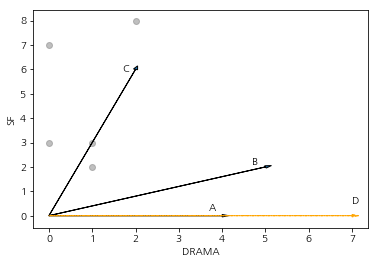

In [20]:
plt.scatter(x='드라마', y='SF', data=res[~res.index.isin(idx_a + idx_b + idx_c + idx_d)], c='grey', alpha=.5)
plt.scatter(x='드라마', y='SF', data=res.loc[idx_d, :], alpha=0.0)
plt.text(3.7, .2, 'A')
plt.text(4.7, 2.1, 'B')
plt.text(1.7, 5.9, 'C')
plt.text(7, .5, 'D')
for vec in res.loc[idx_a + idx_b + idx_c + idx_d, :].iterrows():
    if ~((vec[1]['드라마'] == 7) & (vec[1]['SF'] == 0)):
        plt.arrow(0, 0, vec[1]['드라마'], vec[1]['SF'], head_width=.1)
    else:
        plt.arrow(0, 0, vec[1]['드라마'], vec[1]['SF'], head_width=.1, color='orange', ls='--')
plt.xlabel('DRAMA')
plt.ylabel('SF')
plt.plot()

A와 D는 드라마와 SF 장르라는 차원에서 이루는 각이 $0^\circ$이므로  
$\cos(\theta) = 0$, 즉 완전히 같은 방향을 이루고 있는 vector임을 알 수 있습니다.

<br>
### 그래프로 그릴 수 없는
4차원 이상의 vector space에서도 같은 방식으로 vector들 간의  
방향 유사도를 `cosine distance`를 활용해 나타낼 수 있습니다

스터디 멤버들의 전체 9개 영화 장르에 대한 `cosine similarity`를 구하면 다음과 같습니다

<br>
\begin{align}
\text{similarity}=1-{\text{distance}}
\end{align}
<br>

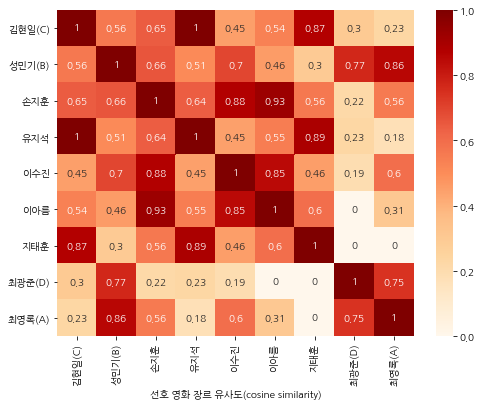

In [21]:
cos_score_all = pd.DataFrame(metrics.pairwise.cosine_distances(res))
cos_score_all.index = target.index
cos_score_all.columns = target.index
plt.figure(figsize=(8,6))
sns.heatmap(1 - cos_score_all, cmap='OrRd', annot=True)
plt.xlabel('선호 영화 장르 유사도(cosine similarity)')
plt.show()

두 vector간의 $\cos(\theta)$ 는  
vector들의 inner product를  
vector들의 magnitude의 곱으로 normalize 한 효과를 줌으로써,  
데이터간의 `크기` 가 아닌 `방향` 을 기준으로 유사도를 측정하고자 할 때 활용할 수 있습니다

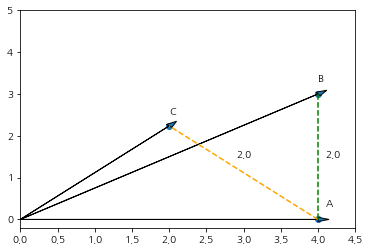

In [22]:
vector_a = [4, 0]
vector_b = [4, 3]
vector_c = [2, np.sqrt(5)]
plt.scatter(list(zip(vector_a, vector_b, vector_c))[0], list(zip(vector_a, vector_b, vector_c))[1])
for vec in [vector_a, vector_b, vector_c]:
    plt.arrow(0, 0, vec[0], vec[1], head_width=.1)
plt.xlim(0, 4.5)
plt.ylim(-0.2, 5)
plt.text(4.1, 0.3, 'A')
plt.text(4, 3.3, 'B')
plt.text(2, 2.5, 'C')


plt.plot([4,2], [0,np.sqrt(5)], '--', c='orange')
plt.plot([4,4], [0,3], '--', c='g')
plt.text(2.9, 1.5, '2.0')
plt.text(4.1, 1.5, '2.0')
plt.show()

위 그래프에서 점 B와 C는 모두 A로 부터 같은 `euclidean distance` 2 만큼 떨어져 있지만  
$\vec{A}$와 이루는 각이 더 작은 $\vec{B}$가 $\vec{C}$보다 더 비슷한 방향을 향하고 있음을 직관적으로 이해할 수 있습니다  
`크기` 가 아닌 `방향`을 측정할 때 새로운 의미가 드러나는 상황입니다 

<br>
### Clustering
은 vector 차원들로 추출하고자 하는 `유사도` 의 개념을 무엇으로 정의하느냐에 따라  
거리를 측정하는 metric부터 달라지게 됩니다.

영화 장르의 선호가 얼마나 비슷한 `방향` 을 향하고 있는지 알고 싶다면 `cosine distance`를 기준으로  
스터디 멤버들의 영화 장르 선호 군집을 찾아볼 수 있을 것 같습니다.

동일 밀도(density)를 기준으로 군집을 찾는  
`DBSCAN`(Density-Based Spatial Clustering of Applications with Noise) 알고리즘을 활용하면서  
metric=`'cosine'`으로 설정하면 `cosine distance`를 기준으로 군집을 탐색합니다

<img src='https://qph.fs.quoracdn.net/main-qimg-fb7f9859bb53437d7b5fadf7363a0001-c' height="300" width="400">

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [23]:
from sklearn.cluster.dbscan_ import DBSCAN

In [24]:
db = DBSCAN(eps=0.3, min_samples=3, metric='cosine')
label = db.fit_predict(res)
cluster = res.reset_index()[['name']]
cluster['label'] = label
print('silhouette: {}'.format(metrics.silhouette_score(res, cluster.label)))

silhouette: 0.46032530595513843


In [25]:
cluster.sort_values(by='label')

genre,name,label
0,김현일,0
3,유지석,0
6,지태훈,0
1,성민기,1
7,최광준,1
8,최영록,1
2,손지훈,2
4,이수진,2
5,이아름,2


DBSCAN 알고리즘이 스터디 멤버들의 선호 영화 장르 군집 3개를 찾았습니다

In [26]:
class0 = df[df.name.isin(cluster.name[cluster.label == 0])]
class1 = df[df.name.isin(cluster.name[cluster.label == 1])]
class2 = df[df.name.isin(cluster.name[cluster.label == 2])]
class0.to_csv('./추천영화_class0.csv', index=False)
class1.to_csv('./추천영화_class1.csv', index=False)
class2.to_csv('./추천영화_class2.csv', index=False)

<br>
유사한 영화 장르 선호를 가진 멤버들의 watched list로 추천 영화 목록을 뽑아 볼 수도 있겠네요

In [27]:
from sklearn.utils import shuffle
shuffle(class0).head(10)

,name,movie,genre
55,지태훈,토르,SF
83,김현일,바람과함께 사라지다,드라마
56,지태훈,퍼시픽림,SF
14,유지석,어벤져스,SF
51,지태훈,해리포터,판타지
82,김현일,부산행,SF
53,지태훈,아이언맨,SF
10,유지석,인셉션,SF
12,유지석,컨택트,SF
19,유지석,바닐라스카이,드라마


스터디 멤버들의 영화 장르 선호 군집화 과제를 진행하면서  
양수 공간에서 문제를 vector space로 확장하고 `방향`을 기준으로 `유사도`를 측정하는 개념을 간단히 공부해봤습니다.  
다음에는 optimization method를 공부한 후에 군집화 알고리즘을 직접 작성해보면 더 재밌겠네요!